Importaciones

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

Carga de datos

In [2]:
import tensorflow_datasets as tfds

# Cargar el conjunto de datos Flowers-102
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# Acceder a los conjuntos de entrenamiento y prueba
train_dataset, test_dataset = dataset['train'], dataset['test']

# Imprimir información sobre el conjunto de datos
print(info)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.XRA4TB_2.1.1/oxford_flowers102-train.tfrecord…

Generating test examples...:   0%|          | 0/6149 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.XRA4TB_2.1.1/oxford_flowers102-test.tfrecord*…

Generating validation examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.XRA4TB_2.1.1/oxford_flowers102-validation.tfr…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see

Normalización

In [3]:
def preprocess_image(image, label):
    # Normalizar la imagen a un rango de [0, 1]
    image = tf.image.resize(image, (224, 224))  # Resize all images to (224, 224)
    image /= 255.0  # Normalize pixel values
    return image, label

# Aplicar la función de preprocesamiento a los conjuntos de datos
train_dataset = train_dataset.map(preprocess_image)
test_dataset = test_dataset.map(preprocess_image)


Configuración del tamaño de los lotes

In [4]:
BATCH_SIZE = 32

# Configurar el tamaño de los lotes y el prefetching
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


Construcción del modelo

In [5]:
model = models.Sequential([
    # Capa de convolución con 32 filtros y tamaño de kernel (3, 3), función de activación ReLU
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    # Segunda capa de convolución con 64 filtros y tamaño de kernel (3, 3), función de activación ReLU
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Tercera capa de convolución con 128 filtros y tamaño de kernel (3, 3), función de activación ReLU
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Aplanar las características extraídas
    layers.Flatten(),

    # Capa densa totalmente conectada con 512 unidades y activación ReLU
    layers.Dense(512, activation='relu'),

    # Capa de salida con activación softmax para clasificación multiclase
    layers.Dense(102, activation='softmax')  # 102 clases en Flowers-102
])


Compilación del modelo

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Entrenamiento del modelo

In [7]:
# Definir los parámetros de entrenamiento
EPOCHS = 10
BATCH_SIZE = 32

# Entrenar el modelo
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)


Epoch 1/10
32/32 [==============================] - 362s 11s/step - loss: 4.7632 - accuracy: 0.0088 - val_loss: 4.4794 - val_accuracy: 0.0311
Epoch 2/10
32/32 [==============================] - 330s 11s/step - loss: 4.2222 - accuracy: 0.0451 - val_loss: 4.1279 - val_accuracy: 0.0568
Epoch 3/10
32/32 [==============================] - 326s 10s/step - loss: 3.5088 - accuracy: 0.1559 - val_loss: 4.0025 - val_accuracy: 0.1039
Epoch 4/10
32/32 [==============================] - 327s 10s/step - loss: 2.4850 - accuracy: 0.4098 - val_loss: 4.1698 - val_accuracy: 0.1134
Epoch 5/10
32/32 [==============================] - 326s 10s/step - loss: 1.2576 - accuracy: 0.6971 - val_loss: 4.8761 - val_accuracy: 0.1068
Epoch 6/10
32/32 [==============================] - 316s 10s/step - loss: 0.4998 - accuracy: 0.8775 - val_loss: 6.4174 - val_accuracy: 0.1199
Epoch 7/10
32/32 [==============================] - 334s 11s/step - loss: 0.1902 - accuracy: 0.9520 - val_loss: 7.9963 - val_accuracy: 0.1321
Epoch 

Evaluación del modelo

In [8]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

193/193 [==============================] - 198s 1s/step - loss: 7.9626 - accuracy: 0.1229
Test Loss: 7.962588787078857
Test Accuracy: 0.12294682115316391


Visualización de resultados

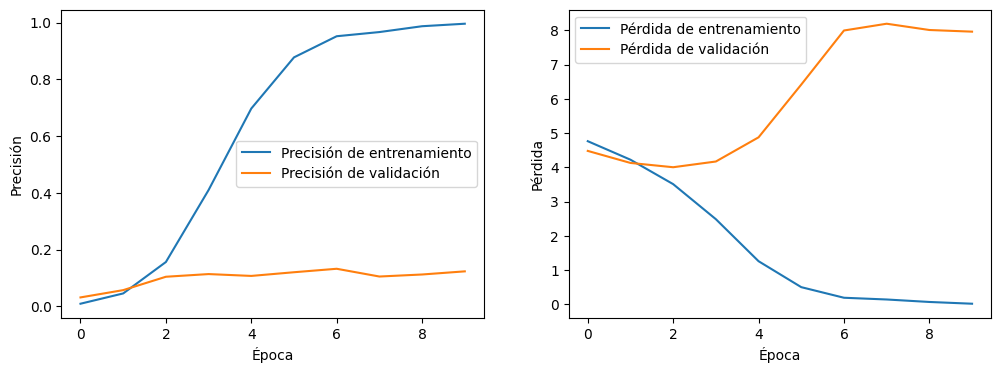

In [9]:
import matplotlib.pyplot as plt

# Graficar precisión y pérdida
plt.figure(figsize=(12, 4))

# Precisión de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Pérdida de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Ejemplos de imágenes de prueba y predicciones

193/193 [==============================] - 204s 1s/step


TypeError: Invalid shape (32, 224, 224, 3) for image data

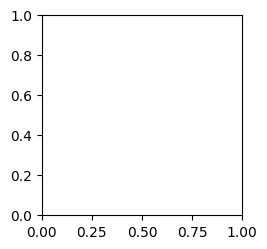

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Etiquetas de las clases (asegúrate de que estas correspondan a tus datos)
class_names = [
    'Pink Primrose', 'Hard-leaved Pocket Orchid', 'Canterbury Bells', 'Sweet Pea', 'English Marigold',
    'Tiger Lily', 'Moon Orchid', 'Bird of Paradise', 'Monkshood', 'Globe Thistle',
    'Snapdragon', 'Colt\'s Foot', 'King Protea', 'Spear Thistle', 'Yellow Iris',
    'Globe-flower', 'Purple Coneflower', 'Peruvian Lily', 'Balloon Flower', 'Giant White Arum Lily',
    'Fire Lily', 'Pincushion Flower', 'Fritillary', 'Red Ginger', 'Grape Hyacinth',
    'Corn Poppy', 'Prince of Wales Feathers', 'Stemless Gentian', 'Artichoke', 'Sweet William',
    'Carnation', 'Gardenia', 'Black-eyed Susan', 'Silverbush', 'Bougainvillea',
    'Water Lily', 'Rose', 'Thorn Apple', 'Morning Glory', 'Passion Flower',
    'Lotus', 'Toad Lily', 'Anthurium', 'Frangipani', 'Clematis',
    'Hibiscus', 'Columbine', 'Desert-rose', 'Tree Mallow', 'Magnolia',
    'Cyclamen', 'Watercress', 'Canna Lily', 'Hippeastrum', 'Bee Balm',
    'Ball Moss', 'Foxglove', 'Bougainvillea', 'Camellia', 'Mallow',
    'Mexican Aster', 'Alpine Sea Holly', 'Rubeckia', 'Sunflower', 'Pelargonium',
    'Wallflower', 'Marigold', 'Butcher\'s Broom', 'Poinsettia', 'Bolero Deep Blue',
    'White Water Lily', 'Water Hyacinth', 'Lenten Rose', 'Barbeton Daisy', 'Dandelion',
    'Bleeding Heart', 'Canna Lily', 'Pitcher Plant', 'Foxglove', 'Bougainvillea',
    'Rose', 'Thorn Apple', 'Morning Glory', 'Passion Flower', 'Lotus',
    'Toad Lily', 'Anthurium', 'Frangipani', 'Clematis', 'Hibiscus',
    'Columbine', 'Desert-rose', 'Tree Mallow', 'Magnolia', 'Cyclamen',
    'Watercress', 'Canna Lily', 'Hippeastrum', 'Bee Balm', 'Ball Moss',
    'Foxglove', 'Bougainvillea', 'Camellia', 'Mallow', 'Mexican Aster'
]

# Obtener predicciones para el conjunto de prueba
predictions = model.predict(test_dataset)

# Seleccionar algunas imágenes de prueba
num_images = 5
plt.figure(figsize=(15, 15))
for i, (image, label) in enumerate(test_dataset.take(num_images)):
    # Convertir la imagen al formato adecuado para visualizarla
    image = image.numpy().astype("uint8")
    label = label.numpy()
    prediction = np.argmax(predictions[i])

    # Mostrar la imagen
    plt.subplot(1, num_images, i + 1)
    plt.imshow(image)
    plt.title(f"Real: {class_names[label]}\nPredicción: {class_names[prediction]}")
    plt.axis('off')
plt.show()


193/193 [==============================] - 197s 1s/step


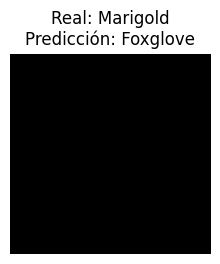

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Etiquetas de las clases (asegúrate de que estas correspondan a tus datos)
class_names = [
    'Pink Primrose', 'Hard-leaved Pocket Orchid', 'Canterbury Bells', 'Sweet Pea', 'English Marigold',
    'Tiger Lily', 'Moon Orchid', 'Bird of Paradise', 'Monkshood', 'Globe Thistle',
    'Snapdragon', 'Colt\'s Foot', 'King Protea', 'Spear Thistle', 'Yellow Iris',
    'Globe-flower', 'Purple Coneflower', 'Peruvian Lily', 'Balloon Flower', 'Giant White Arum Lily',
    'Fire Lily', 'Pincushion Flower', 'Fritillary', 'Red Ginger', 'Grape Hyacinth',
    'Corn Poppy', 'Prince of Wales Feathers', 'Stemless Gentian', 'Artichoke', 'Sweet William',
    'Carnation', 'Gardenia', 'Black-eyed Susan', 'Silverbush', 'Bougainvillea',
    'Water Lily', 'Rose', 'Thorn Apple', 'Morning Glory', 'Passion Flower',
    'Lotus', 'Toad Lily', 'Anthurium', 'Frangipani', 'Clematis',
    'Hibiscus', 'Columbine', 'Desert-rose', 'Tree Mallow', 'Magnolia',
    'Cyclamen', 'Watercress', 'Canna Lily', 'Hippeastrum', 'Bee Balm',
    'Ball Moss', 'Foxglove', 'Bougainvillea', 'Camellia', 'Mallow',
    'Mexican Aster', 'Alpine Sea Holly', 'Rubeckia', 'Sunflower', 'Pelargonium',
    'Wallflower', 'Marigold', 'Butcher\'s Broom', 'Poinsettia', 'Bolero Deep Blue',
    'White Water Lily', 'Water Hyacinth', 'Lenten Rose', 'Barbeton Daisy', 'Dandelion',
    'Bleeding Heart', 'Canna Lily', 'Pitcher Plant', 'Foxglove', 'Bougainvillea',
    'Rose', 'Thorn Apple', 'Morning Glory', 'Passion Flower', 'Lotus',
    'Toad Lily', 'Anthurium', 'Frangipani', 'Clematis', 'Hibiscus',
    'Columbine', 'Desert-rose', 'Tree Mallow', 'Magnolia', 'Cyclamen',
    'Watercress', 'Canna Lily', 'Hippeastrum', 'Bee Balm', 'Ball Moss',
    'Foxglove', 'Bougainvillea', 'Camellia', 'Mallow', 'Mexican Aster'
]

# Obtener predicciones para el conjunto de prueba
predictions = model.predict(test_dataset)

# Seleccionar algunas imágenes de prueba
num_images = 5
plt.figure(figsize=(15, 15))
plot_index = 1  # Initialize plot index
for i, (image_batch, label_batch) in enumerate(test_dataset.take(num_images)):
    # Iterate over images in the batch
    for j in range(image_batch.shape[0]):
        image = image_batch[j].numpy().astype("uint8")
        label = label_batch[j].numpy()
        prediction = np.argmax(predictions[i * image_batch.shape[0] + j])  # Adjust index for batch

        # Mostrar la imagen
        plt.subplot(1, num_images, plot_index)  # Adjust subplot index
        plt.imshow(image)
        plt.title(f"Real: {class_names[label]}\nPredicción: {class_names[prediction]}")
        plt.axis('off')
plt.show()